In [1]:
import SimpleITK as sitk
import pims
# from nd2reader import ND2Reader
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.insert(0,'/home/jmamede/scripts')
# from support_pla import othercolor, cell_mask, multiply, rebin
from support_pla import convert16to8bits
sys.path.insert(0,'/home/jmamede/scripts/notebooks/libraries')
from deco_libraries import pimsmeta2OMEXML

from glob import glob

from pystackreg import StackReg
# from skimage import io

def rebin(arr, new_shape):
    from PIL import Image
    return np.array(Image.fromarray(arr).resize(new_shape,resample=Image.NEAREST))

def calculate_reg(ref,mov,name):
    from pystackreg import StackReg
    transformations = {
        'TRANSLATION': StackReg.TRANSLATION,
        'RIGID_BODY': StackReg.RIGID_BODY,
        'SCALED_ROTATION': StackReg.SCALED_ROTATION,
        'AFFINE': StackReg.AFFINE,
        'BILINEAR': StackReg.BILINEAR
    }
    sr = StackReg(transformations[name])
    return sr,sr.register(ref, mov,)

def registration(image,tmat,name='AFFINE'):
    from pystackreg import StackReg
    from skimage import transform, io, exposure
    transformations = {
        'TRANSLATION': StackReg.TRANSLATION,
        'RIGID_BODY': StackReg.RIGID_BODY,
        'SCALED_ROTATION': StackReg.SCALED_ROTATION,
        'AFFINE': StackReg.AFFINE,
        'BILINEAR': StackReg.BILINEAR
    }
    sr = StackReg(transformations[name])
    return sr.transform(image,tmat)
    

In [2]:
ficheiros = glob('/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/*tif')

In [3]:
ficheiros.sort()
ficheiros

['/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C0-DAPI-InfectedSNs.ome.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C0-GFAP-InfectedSNs.ome.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C0-S100b-InfectedSNs.ome.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C0-Tuj1-InfectedSNs.ome.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-DAPI-InfectedSNs.XY.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-DAPI-InfectedSNs.ome.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-Ecad-InfectedSNs.XY.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-Ecad-InfectedSNs.ome.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-Iba1-InfectedSNs.XY.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-Iba1-InfectedSNs.ome.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-cGAS-InfectedSNs.XY.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-cGAS-InfectedSNs.ome.tif',
 '/home/jmamede/Dat

In [20]:
ref = pims.open(ficheiros[0])[0]
mov = pims.open(ficheiros[5])[0]
movf = pims.open(ficheiros[4])[0]
# len(a)
import napari
v = napari.Viewer(ndisplay=2)
mov = np.roll(mov,13,axis=1)
mov = np.roll(mov,-10,axis=0)
# mov = np.roll(mov,0,axis=1)
# mov = np.roll(mov,0,axis=0)
v.add_image(ref,blending='additive',colormap='green')
v.add_image(mov,blending='additive',colormap='red')
v.add_image(mov,blending='additive',colormap='blue')


<Image layer 'mov [1]' at 0x7efc6ff42d50>

In [15]:
ficheiros[10]

'/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C2-DAPI-InfectedSNs.ome.tif'

In [23]:
ref = pims.open(ficheiros[0])[0]
mov = pims.open(ficheiros[10])[0]
# len(a)
import napari
v = napari.Viewer(ndisplay=2)
mov = np.roll(mov,-275,axis=1)
mov = np.roll(mov,-25,axis=0)
v.add_image(ref,blending='additive',colormap='green')
v.add_image(mov,blending='additive',colormap='red')


<Image layer 'mov' at 0x7fd641b8c2d0>

In [25]:
reader = pims.Bioformats.open(ficheiros[4])

Frame([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)
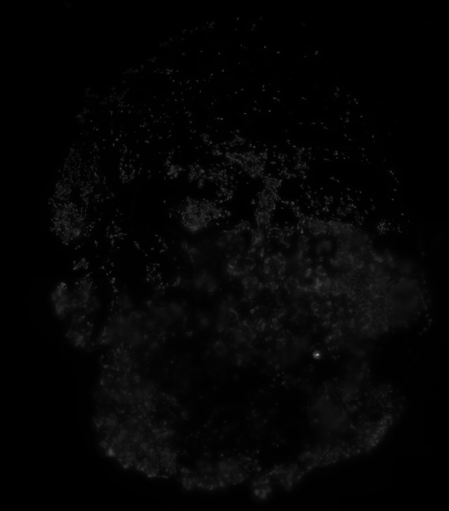

In [31]:
reader[0]

In [44]:
ficheiros

['/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C0-DAPI-InfectedSNs.ome.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C0-GFAP-InfectedSNs.ome.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C0-S100b-InfectedSNs.ome.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C0-Tuj1-InfectedSNs.ome.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-DAPI-InfectedSNs.XY.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-DAPI-InfectedSNs.ome.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-Ecad-InfectedSNs.XY.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-Ecad-InfectedSNs.ome.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-Iba1-InfectedSNs.XY.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-Iba1-InfectedSNs.ome.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-cGAS-InfectedSNs.XY.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-cGAS-InfectedSNs.ome.tif',
 '/home/jmamede/Dat

In [13]:
import tifffile



# tifprj = tf.TiffWriter(prjfile, bigtiff=True, imagej=False)

for ficheiro in ficheiros[4:8]:
    reader = pims.bioformats.BioformatsReader(ficheiro,java_memory='4096m')
    with tifffile.TiffWriter(reader.filename[:-8]+'.XY.tif', bigtiff=True, imagej=False) as tif:
#         prjxml = pimsmeta2OMEXML(reader, project=True,verbose=False)
        moving_rolling = np.roll(reader[0],13,axis=1)
        moving_rolling = np.roll(moving_rolling,-10,axis=0)
        tif.save( moving_rolling,
            tile = (2048, 2048),
                        compression='ZLIB',
#                         description = prjxml.to_xml(),
            photometric='minisblack',
            #, datetime= True
            metadata= None,
#             contiguous=False,
            )


In [49]:
ref = pims.open(ficheiros[1])
mov = pims.open(ficheiros[12])

In [50]:
sizes = np.array([mov.frame_shape,ref.frame_shape]).T
empty = sizes[0].max(),sizes[1].max()

ref.frame_shape

(15635, 13758)

In [51]:
sizes = np.array([mov.frame_shape,ref.frame_shape]).T
empty = sizes[0].max(),sizes[1].max()
ref2 = np.zeros(empty ).astype(np.uint16)
mov2 = np.zeros(empty ).astype(np.uint16)
ref2[:ref.frame_shape[0],:ref.frame_shape[1]] = np.array(ref[0]).astype(np.uint16)
mov2[:mov.frame_shape[0],:mov.frame_shape[1]] = np.array(mov[0]).astype(np.uint16)


In [38]:
del mov2
del mov

In [52]:
import napari
v = napari.Viewer(ndisplay=2)
v.add_image(ref2,blending='additive',colormap='green')
v.add_image(mov2,blending='additive',colormap='red')

<Image layer 'mov2' at 0x7fadeeba5c50>

Frame([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)
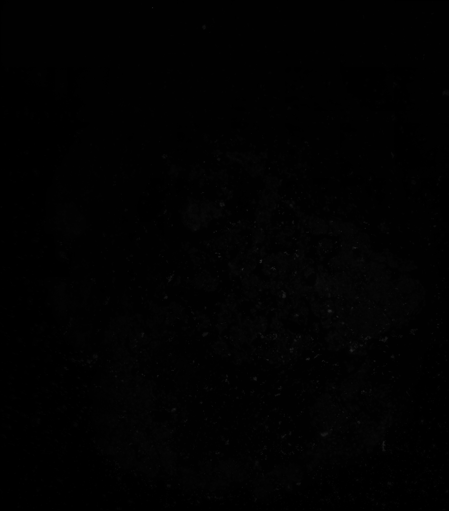

In [21]:
pims.Frame(ref2)

In [63]:
ficheiros

['/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C0-DAPI-InfectedSNs.ome.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C0-GFAP-InfectedSNs.ome.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C0-S100b-InfectedSNs.ome.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C0-Tuj1-InfectedSNs.ome.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-DAPI-InfectedSNs.XY.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-DAPI-InfectedSNs.ome.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-Ecad-InfectedSNs.XY.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-Ecad-InfectedSNs.ome.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-Iba1-InfectedSNs.XY.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-Iba1-InfectedSNs.ome.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-cGAS-InfectedSNs.XY.tif',
 '/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C1-cGAS-InfectedSNs.ome.tif',
 '/home/jmamede/Dat

In [79]:
# quarter = tuple(np.round(np.array(ref2.shape)/5).astype('int'))
# #Translational transformation
# sr = StackReg(StackReg.BILINEAR)
# mta1 = sr.register(
# #     ref,
# #     mov
#     ref2[quarter[0]:-quarter[0],quarter[1]:-quarter[1]],
#     mov2[quarter[0]:-quarter[0],quarter[1]:-quarter[1]]
#                              )
ref = pims.open(ficheiros[1])
mov = pims.open(ficheiros[12])

sizes = np.array([mov.frame_shape,ref.frame_shape]).T
empty = sizes[0].max(),sizes[1].max()
ref2 = np.zeros(empty ).astype(np.uint16)
mov2 = np.zeros(empty ).astype(np.uint16)
ref2[:ref.frame_shape[0],:ref.frame_shape[1]] = np.array(ref[0]).astype(np.uint16)
mov2[:mov.frame_shape[0],:mov.frame_shape[1]] = np.array(mov[0]).astype(np.uint16)

# quarter = tuple(np.round(np.array(ref2.shape)/5).astype('int'))
#Translational transformation
sr = StackReg(StackReg.AFFINE)
mta1 = sr.register(
#     ref,
#     mov
    ref2,
    mov2
)

In [78]:
print(ficheiros[1])
print(ficheiros[12])

/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C0-GFAP-InfectedSNs.ome.tif
/home/jmamede/Data/Janet/mIF/20211122mIFOrganoids/C2-CD56-InfectedSNs.ome.tif


In [54]:
mta1

array([[ 9.97590517e-01, -1.50577602e-03,  2.18084555e+02],
       [-7.88292489e-04,  1.00033582e+00,  2.11669035e+02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [10]:
# mta1 = np.array([
#        [ 9.72906252e-01, -5.77038972e-04,  2.28679418e+02],
#        [ 1.19587670e-04,  9.65295762e-01,  2.63488356e+02],
#        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]
# )

In [8]:
# mta1 = np.array([[ 1.00108756e+00,  1.24853472e-04, -1.21100576e+01],
#        [ 3.28726193e-03,  1.00099829e+00, -4.27326598e+01],
#        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [80]:
test1 = sr.transform(mov2,tmat=mta1)

In [81]:
import napari
v = napari.Viewer(ndisplay=2)
v.add_image(ref2,blending='additive',colormap='green')
v.add_image(mov2,blending='additive',colormap='red')
v.add_image(test1,blending='additive',colormap='cyan')

<Image layer 'test1' at 0x7fac88abb210>

In [82]:
import tifffile
# prjfile = '/run/media/jmamede/Joao/multiplex/ENDO/out/img2_registered.tiff'


# tifprj = tf.TiffWriter(prjfile, bigtiff=True, imagej=False)

# reader = pims.bioformats.BioformatsReader(ficheiro,java_memory='4096m')
# with tifffile.TiffWriter(prjfile, bigtiff=True, imagej=False) as tif:
#     for i in range(len(mov)):
#         print(i)
#         mov2 = np.zeros(empty).astype(np.uint8)
#         moving_rolling = np.roll(mov[i],-2305,axis=1)
#         moving_rolling = np.roll(moving_rolling,100,axis=0)

#         mov2[:mov.frame_shape[0],:mov.frame_shape[1]] = moving_rolling.astype(np.uint8)
#         del moving_rolling
#         test1 = sr.transform(mov2,tmat=mta3)
#         tif.save( test1.astype(np.uint8),
#             tile = (2048, 2048),
# #                         compression=9,
# #                         description = xml.to_xml(),
#             photometric='minisblack',
#             #, datetime= True
#             metadata= None,
#             contiguous=False,
#             )
#         del test1
        
        
for ficheiro in ficheiros[12:15]:
    reader = pims.bioformats.BioformatsReader(ficheiro,java_memory='4096m')
    with tifffile.TiffWriter(reader.filename[:-8]+'.XY.tif', bigtiff=True, imagej=False) as tif:
#         prjxml = pimsmeta2OMEXML(reader, project=True,verbose=False)
        test1 = sr.transform(reader[0],tmat=mta1)
        tif.save( test1,
            tile = (2048, 2048),
                        compression='ZLIB',
#                         description = prjxml.to_xml(),
            photometric='minisblack',
            #, datetime= True
            metadata= None,
#             contiguous=False,
            )


Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.


In [27]:
mov
mov2[:mov.frame_shape[0],:mov.frame_shape[1]] = mov[dapich]

NameError: name 'test1' is not defined

In [7]:
ficheiros = glob('/run/media/jmamede/Joao/multiplex/ENDO/out/*8bit*tiff')
ficheiros.sort()

#load reference and "moved" image
ref = pims.open(ficheiros[0])
mov = pims.open(ficheiros[1])


sizes = np.array([mov.frame_shape,ref.frame_shape]).T
empty = sizes[0].max(),sizes[1].max()

ref2 = np.zeros(empty )
mov2 = np.zeros(empty )


sr = StackReg(StackReg.AFFINE)

In [8]:
# quarter = tuple(np.round(np.array(ref2.shape)/5).astype('int'))


# mta3 = sr.register(
#     ref2[quarter[0]:-quarter[0],quarter[1]:-quarter[1]],
#     mov2[quarter[0]:-quarter[0],quarter[1]:-quarter[1]]
#                              )

In [9]:
# mta3 = np.array([[ 1.00108756e+00,  1.24853472e-04, -1.21100576e+01],
#        [ 3.28726193e-03,  1.00099829e+00, -4.27326598e+01],
#        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

mta3 = np.array([[ 9.98186010e-01, -9.85277006e-04,  1.08630602e+01],
       [ 9.66418193e-04,  9.97938822e-01,  8.23410514e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [14]:
mov2.reshape((1,1,)+(mov2.shape)).shape

(1, 19813, 35570)

In [17]:
tif.close()

In [8]:
ref2 = rebin(ref2,(ref2.shape[0]//2,ref2.shape[1]//2))
mov2 = rebin(mov2,(mov2.shape[0]//2,mov2.shape[1]//2) )

In [9]:
ref2.shape

(17785, 9907)

In [10]:
%timeit -n1 -r 2 print('asdf')

asdf
asdf
63.4 µs ± 25.2 µs per loop (mean ± std. dev. of 2 runs, 1 loop each)


In [11]:

#Translational transformation
sr = StackReg(StackReg.TRANSLATION)
out_tra = sr.register(ref2, mov2)

In [13]:
sr2 = StackReg(StackReg.TRANSLATION)
out_tra2 = sr2.register(ref[0][4940:14818,8893:26678], mov[0][4940:14818,8893:26678])

In [5]:
out_tra = np.array([[  1.        ,   0.        , 641.24722516],
       [  0.        ,   1.        , -83.64280372],
       [  0.        ,   0.        ,   1.        ]])


In [6]:
out_tra2 = np.array([[  1.        ,   0.        , 641.24722516*2],
       [  0.        ,   1.        , -83.64280372*2],
       [  0.        ,   0.        ,   1.        ]])

In [8]:
ref2 = np.zeros((19814,35570))
mov2 = np.zeros((19814,35570))
ref2[:ref.frame_shape[0],:ref.frame_shape[1]] = ref[0]
mov2[:mov.frame_shape[0],:mov.frame_shape[1]] = mov[0]

sr = StackReg(StackReg.TRANSLATION)
test1 = sr.transform(mov2,tmat=out_tra)

In [11]:
s2 = StackReg(StackReg.TRANSLATION)
test2 = s2.transform(mov[0],tmat=out_tra2)

In [20]:
#Rigid Body transformation
sr = StackReg(StackReg.RIGID_BODY)
out_rot = sr.register(ref2, mov2)

In [51]:
out_rot = out_rot*2

In [ ]:
out_rot[2][2] = 1.0
out_rot
test2 = sr.transform(mov2,tmat=out_rot)

In [59]:
out_rot[2][2] = 1
out_rot

array([[ 1.99999983e+00, -8.24006515e-04,  1.28852116e+03],
       [ 8.24006515e-04,  1.99999983e+00, -1.70715351e+02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [40]:
#Scaled Rotation transformation
sr = StackReg(StackReg.SCALED_ROTATION)
out_sca = sr.register(ref2, mov2)

In [ ]:
out_sca.shape

In [29]:
#Affine transformation
sr = StackReg(StackReg.AFFINE)
out_aff = sr.register(ref2, mov2)


In [36]:
out_aff[1]

array([ 3.27281430e-01,  1.13811964e+00, -2.77346128e+03])

In [ ]:
#Bilinear transformation
sr = StackReg(StackReg.BILINEAR)
out_bil = sr.register(ref2, mov2)

In [ ]:
out_bil.shape

In [43]:
ref2.shape

(19814, 35570)

In [19]:
# reg_im = np.zeros((19814, 35570,4))
# reg_im[...,0] = ref2
# reg_im[...,1] = mov2
# reg_im[...,2] = test1
# reg_im[...,3] = test2

# reg_im[...,3] = out_rot 
# reg_im[...,4] = out_sca
# reg_im[...,5] = out_aff
# reg_im[...,6] = out_tra
# reg_im[...,7] = out_bil

ValueError: could not broadcast input array from shape (19759,35570) into shape (19814,35570)

In [13]:


cmap = ['green','red','cyan','red','red','red','red','red','red','red']

for i,img in enumerate([ref[0],mov[0],test1,test2]):
    v.add_image(img,name='image'+str(i),blending='additive',colormap=cmap[i])

/home/jmamede/anaconda3/lib/python3.7/site-packages/napari/_vispy/vispy_image_layer.py:186: UserWarning: data shape (19813, 33534) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  ndisplay=self.layer._ndisplay,
/home/jmamede/anaconda3/lib/python3.7/site-packages/napari/_vispy/vispy_image_layer.py:186: UserWarning: data shape (19759, 35570) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  ndisplay=self.layer._ndisplay,
/home/jmamede/anaconda3/lib/python3.7/site-packages/napari/_vispy/vispy_image_layer.py:186: UserWarning: data shape (19814, 35570) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  ndisplay=self.layer._ndisplay,
/home/jmamede/anaconda3/lib/python3.7/site-packages/napari/_vispy/vispy_image_layer.py:186: UserWarning: data shape (19759, 35570) exceeds GL_MAX_TEXTURE_SIZE 1638

In [48]:
v.add_image(reg_im[...,2],name='image'+str(i),blending='additive',colormap=cmap[i])

/home/jmamede/anaconda3/lib/python3.7/site-packages/napari/_vispy/vispy_image_layer.py:186: UserWarning: data shape (19814, 35570) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  ndisplay=self.layer._ndisplay,


<Image layer 'image1 [1]' at 0x7f8d843c15d0>

/home/jmamede/anaconda3/lib/python3.7/site-packages/napari/_vispy/vispy_image_layer.py:186: UserWarning: data shape (19814, 35570) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  ndisplay=self.layer._ndisplay,
/home/jmamede/anaconda3/lib/python3.7/site-packages/napari/_vispy/vispy_image_layer.py:186: UserWarning: data shape (19814, 35570) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  ndisplay=self.layer._ndisplay,
/home/jmamede/anaconda3/lib/python3.7/site-packages/napari/_vispy/vispy_image_layer.py:186: UserWarning: data shape (19814, 35570) exceeds GL_MAX_TEXTURE_SIZE 16384 in at least one axis and will be downsampled. Rendering is currently in 2D mode.
  ndisplay=self.layer._ndisplay,
/home/jmamede/anaconda3/lib/python3.7/site-packages/napari/_vispy/vispy_image_layer.py:186: UserWarning: data shape (19814, 35570) exceeds GL_MAX_TEXTURE_SIZE 1638

In [39]:
import pims
# from nd2reader import ND2Reader
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.insert(0,'/home/jmamede/scripts')
# from support_pla import othercolor, cell_mask, multiply, rebin
from support_pla import convert16to8bits
from pystackreg import StackReg

# from skimage import io

#load reference and "moved" image

reg_channel = 3

image0 = pims.open('/home/jmamede/Data/multiplex/KOTHP1/DAPI-iGFP-INmruby3-bactin647_v01_PRJ.Custom.ome.tiff')
image1 = pims.open('/home/jmamede/Data/multiplex/KOTHP1/DAPI-1a11_488-241_647_v01_PRJ.Custom.ome.tiff')

ref = image0[reg_channel]
mov = image1[reg_channel]

/home/jmamede/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.tiff_stack.TiffStack_tifffile'> errored: 'NoneType' object has no attribute 'TiffFile'
  warn(message)


In [40]:
def calculate_reg(ref,mov,name):
    from pystackreg import StackReg
    transformations = {
        'TRANSLATION': StackReg.TRANSLATION,
        'RIGID_BODY': StackReg.RIGID_BODY,
        'SCALED_ROTATION': StackReg.SCALED_ROTATION,
        'AFFINE': StackReg.AFFINE,
        'BILINEAR': StackReg.BILINEAR
    }
    sr = StackReg(transformations[name])
    return sr.register(ref, mov,)

def registration(image,tmat,name='AFFINE'):
    from pystackreg import StackReg
    from skimage import transform, io, exposure
    transformations = {
        'TRANSLATION': StackReg.TRANSLATION,
        'RIGID_BODY': StackReg.RIGID_BODY,
        'SCALED_ROTATION': StackReg.SCALED_ROTATION,
        'AFFINE': StackReg.AFFINE,
        'BILINEAR': StackReg.BILINEAR
    }

    sr = StackReg(transformations[name])
    return sr.transform(image,tmat)
    
# def registration_gpu(image,tmat):
#     #it's not working it's inverted....
#     import cupy as cp
#     from cupyx.scipy.ndimage import affine_transform
    
#     return cp.asnumpy(
#         affine_transform(
#             cp.asarray(image),
#             cp.asarray(tmat)
#         )
#     )

matrix = calculate_reg(ref,mov,'AFFINE')


In [59]:
image1.sizes
result = np.zeros((image1.sizes['t'],image1.sizes['x'],image1.sizes['y']))

for i in range(image1.sizes['t']):
    result[i,:,:] = registration(image1[i],matrix,'AFFINE')
# result_gpu = registration_gpu(mov,matrix)

In [77]:
import napari
from vispy.color import Colormap
v = napari.Viewer(ndisplay=2)
# cmap = Colormap([[1, 0, 0], [0, 0, 0], [0, 0, 1]])
# cmap = ['green','red','red','bluered','red','red','red','red','red','red']
cmap = ['magenta','red','green','blue']

names = ['B-actin','IN-mruby3','iGFP','DAPI','CA-241','Blank','PQBP1','DAPI2']
j = 0
for img in [image0,result]:
    for i in range(4):
        v.add_image(img[i],name=names[j],blending='additive',
                    colormap=cmap[i]                    
#                     colormap=('diverging', cmap)
                   )
        j +=1